In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
TIMESTEPS = 10
TRAINING_EXAMPLES = 10000
TESTING_EXAMPLES = 1000
SAMPLE_GAP = 0.01

def generate_data(seq):
    X = []
    y = []
    for i in range(len(seq) - TIMESTEPS):
        X.append([seq[i: i + TIMESTEPS]])
        y.append([seq[i + TIMESTEPS]])
        
    return np.array(X), np.array(y)

In [3]:
test_start = (TRAINING_EXAMPLES + TIMESTEPS) * SAMPLE_GAP
test_end = test_start + (TESTING_EXAMPLES + TIMESTEPS) * SAMPLE_GAP

train_X, train_y = generate_data(np.sin(np.linspace(0, test_start, TRAINING_EXAMPLES + TIMESTEPS)))
test_X, test_y = generate_data(np.sin(np.linspace(test_start, test_end, TESTING_EXAMPLES + TIMESTEPS)))

train_X.shape

(10000, 1, 10)

In [4]:
train_y.shape

(10000, 1)

## 这里需要修改数据的维度，时间序列长度应该在第二维

In [5]:
train_X = train_X.swapaxes(1, 2)
test_X = test_X.swapaxes(1, 2)

train_X.shape, test_X.shape

((10000, 10, 1), (1000, 10, 1))

In [6]:
train_X[0]

array([[0.        ],
       [0.01000083],
       [0.02000066],
       [0.0299985 ],
       [0.03999333],
       [0.04998416],
       [0.05996999],
       [0.06994982],
       [0.07992266],
       [0.0898875 ]])

In [7]:
train_set = tf.data.Dataset.from_tensor_slices((train_X, train_y))
test_set = tf.data.Dataset.from_tensor_slices((test_X, test_y))

BATCH_SIZE = 64
train_set = train_set.batch(BATCH_SIZE).shuffle(TRAINING_EXAMPLES).repeat()
test_set = test_set.batch(BATCH_SIZE)

## LSTM层
输入LSTM层的数据维度应为**batch_size $\times$ timesteps $\times$ data_dim**，其中**data_dim**为某一时刻的数据维度。

参数：
* **units**：隐藏层节点数
* **return_sequences**：
    * **True**：返回所有神经元的输出，即返回一个序列
    * **False**：只返回最后一个神经元的输出

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=30, input_shape=[10, 1], return_sequences=True),
    tf.keras.layers.LSTM(units=30),
    tf.keras.layers.Dense(units=1)
])

model.summary()

model.compile(loss='mse',
             optimizer='adam',
             metrics=['mse'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 30)            3840      
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 11,191
Trainable params: 11,191
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(train_set,
                   epochs=100,
                   steps_per_epoch=int(np.ceil(TRAINING_EXAMPLES / float(BATCH_SIZE))),
                   verbose=1)

Epoch 1/100
157/157 [==============================] - 6s 38ms/step - loss: 0.0369 - mse: 0.0370: 0s - loss: 0.0441 - mse
Epoch 2/100
157/157 [==============================] - 3s 16ms/step - loss: 0.0035 - mse: 0.0035
Epoch 3/100
157/157 [==============================] - 3s 17ms/step - loss: 0.0032 - mse: 0.0032
Epoch 4/100
157/157 [==============================] - 3s 16ms/step - loss: 0.0026 - mse: 0.0026
Epoch 5/100
157/157 [==============================] - 3s 16ms/step - loss: 0.0029 - mse: 0.0029
Epoch 6/100
157/157 [==============================] - 3s 20ms/step - loss: 0.0024 - mse: 0.0025
Epoch 7/100
157/157 [==============================] - 3s 19ms/step - loss: 0.0018 - mse: 0.0018
Epoch 8/100
157/157 [==============================] - 3s 21ms/step - loss: 0.0020 - mse: 0.0020
Epoch 9/100
157/157 [==============================] - 3s 19ms/step - loss: 0.0018 - mse: 0.0018
Epoch 10/100
157/157 [==============================] - 3s 18ms/step - loss: 0.0017 - mse: 0.0017
Epoc

157/157 [==============================] - 4s 26ms/step - loss: 2.6823e-05 - mse: 2.6921e-05
Epoch 74/100
157/157 [==============================] - 3s 20ms/step - loss: 5.0551e-05 - mse: 5.0791e-05
Epoch 75/100
157/157 [==============================] - 3s 21ms/step - loss: 2.0939e-05 - mse: 2.0993e-05
Epoch 76/100
157/157 [==============================] - 3s 22ms/step - loss: 1.0693e-05 - mse: 1.0733e-05
Epoch 77/100
157/157 [==============================] - 4s 23ms/step - loss: 1.5185e-05 - mse: 1.5246e-05
Epoch 78/100
157/157 [==============================] - ETA: 0s - loss: 1.1925e-05 - mse: 1.1983e-0 - 3s 20ms/step - loss: 1.2013e-05 - mse: 1.2071e-05
Epoch 79/100
157/157 [==============================] - 3s 18ms/step - loss: 5.9596e-05 - mse: 5.9813e-05
Epoch 80/100
157/157 [==============================] - 3s 21ms/step - loss: 6.3931e-05 - mse: 6.4046e-05: 1s - loss: 1.0698e-04 - mse: 1 - ETA: 1s - loss: 9.2431e-0
Epoch 81/100
157/157 [==============================] - 3s 

In [10]:
pre = model.predict(test_set)
pre

array([[-0.32313865],
       [-0.31365746],
       [-0.30414397],
       [-0.29459912],
       [-0.28502384],
       [-0.27541903],
       [-0.26578578],
       [-0.25612494],
       [-0.24643762],
       [-0.23672464],
       [-0.22698705],
       [-0.21722583],
       [-0.20744193],
       [-0.19763643],
       [-0.18781029],
       [-0.1779645 ],
       [-0.16810007],
       [-0.15821807],
       [-0.14831947],
       [-0.13840531],
       [-0.12847663],
       [-0.11853448],
       [-0.1085799 ],
       [-0.09861391],
       [-0.08863755],
       [-0.07865194],
       [-0.06865808],
       [-0.05865706],
       [-0.04864993],
       [-0.03863778],
       [-0.02862167],
       [-0.01860267],
       [-0.00858186],
       [ 0.00143968],
       [ 0.01146087],
       [ 0.02148063],
       [ 0.03149788],
       [ 0.04151152],
       [ 0.0515205 ],
       [ 0.06152371],
       [ 0.07152008],
       [ 0.08150852],
       [ 0.09148797],
       [ 0.10145732],
       [ 0.11141551],
       [ 0

In [11]:
pre = pre.squeeze()
test_y = test_y.squeeze()
rmse = np.sqrt((pre - test_y) ** 2).mean(axis=0)
rmse

0.0029476911168718986

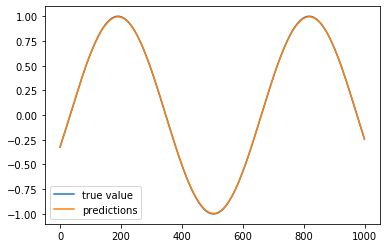

In [12]:
plt.figure()
plt.plot(test_y, label='true value')
plt.plot(pre, label='predictions')
plt.legend()
plt.show()